In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [3]:
def fpr(y_true,y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    fpr=fp/(fp+tn)
    return(fpr)

In [4]:
additional_metrics = ['accuracy']
loss_function = BinaryCrossentropy()
number_of_epochs = 500
optimizer = Adam()
verbosity_mode = 1
layer_size = 10

In [5]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [8]:
m=75000
n=25000
r=0.5

In [9]:
data=np.empty(n,dtype=int)
for i in range(0,n):
    data[i]=random.randint(0, 100000000)

In [10]:
mean = sum(data)/len(data)
std = np.std(data)
print(mean)
print(std)

-10307.17412
28889674.14679112
<ipython-input-10-7f0f3a9e79f6>:1: RuntimeWarning: overflow encountered in long_scalars
  mean = sum(data)/len(data)


In [11]:
new_data = []
for x in data:
    new_data+=[(x-mean)/std]

In [12]:
x = []
for i in new_data:
    x+=[[i]]
x_train = np.array(x)
y = []
for i in range(0,n):
    if(i<int(n*r)):
        y+=[[1]]
    else:
        y+=[[0]]
y_train = np.array(y)
print(x_train)
print(y_train)

[[3.41654121]
 [0.65663562]
 [3.29961884]
 ...
 [0.6076881 ]
 [0.63436116]
 [3.33151983]]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [13]:
batch_size = len(x_train)

In [14]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

===================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5024
Epoch 300/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5024
Epoch 301/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 302/500
1/1 [==============================] - 0s 47ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 303/500
1/1 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 304/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 305/500
1/1 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 306/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 307/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 308/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 309/500
1/1 [=================

In [15]:
import matplotlib.pyplot as plt

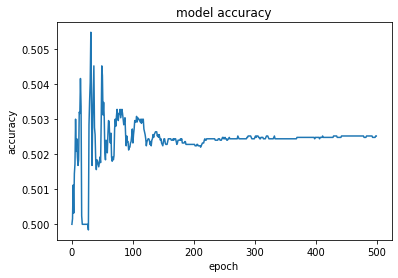

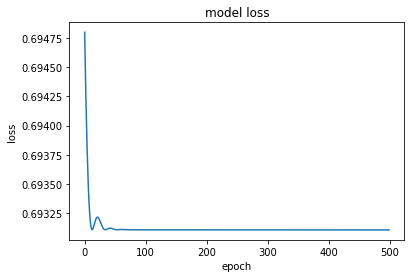

In [16]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

In [17]:
number_of_epochs = 150
layer_size = 50

In [18]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Epoch 1/150
1/1 [==============================] - 1s 656ms/step - loss: 0.7016 - accuracy: 0.5000
Epoch 2/150
1/1 [==============================] - 0s 15ms/step - loss: 0.6995 - accuracy: 0.4995
Epoch 3/150
1/1 [==============================] - 0s 11ms/step - loss: 0.6973 - accuracy: 0.5007
Epoch 4/150
1/1 [==============================] - 0s 13ms/step - loss: 0.6953 - accuracy: 0.5002
Epoch 5/150
1/1 [==============================] - 0s 12ms/step - loss: 0.6939 - accuracy: 0.5023
Epoch 6/150
1/1 [==============================] - 0s 12ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 7/150
1/1 [==============================] - 0s 13ms/step - loss: 0.6933 - accuracy: 0.5003
Epoch 8/150
1/1 [==============================] - 0s 11ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 9/150
1/1 [==============================] - 0s 24ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 10/150
1/1 [==============================] - 0s 18ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 11/150
1/1 [

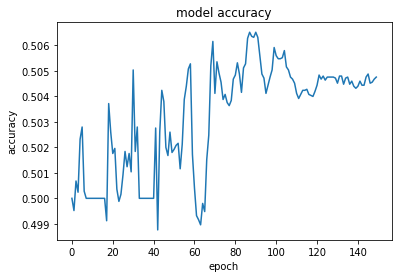

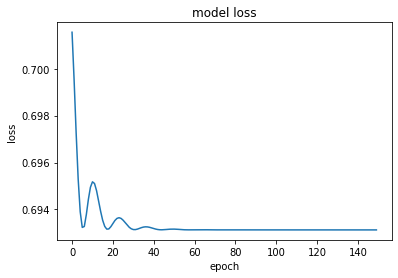

In [22]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=50

In [23]:
layer_size = 200
number_of_epochs = 100
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 695ms/step - loss: 0.6997 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 0.6957 - accuracy: 0.4991
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6934 - accuracy: 0.4990
Epoch 4/100
1/1 [==============================] - 0s 43ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 43ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 6/100
1/1 [==========

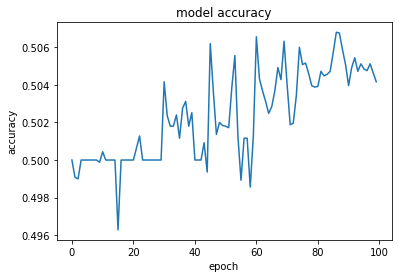

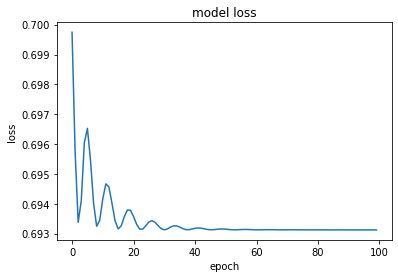

In [24]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=200

In [25]:
number_of_epochs = 60
layer_size = 1000
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              2000      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
1/1 [==============================] - 1s 887ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 2/60
1/1 [==============================] - 0s 188ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 3/60
1/1 [==============================] - 0s 238ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/60
1/1 [==============================] - 0s 218ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 5/60
1/1 [==============================] - 0s 225ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 6/60
1/1 [========

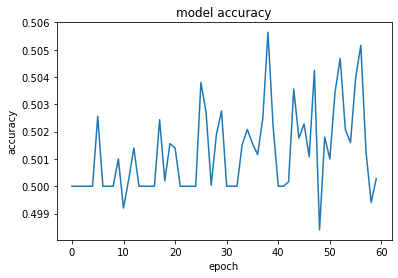

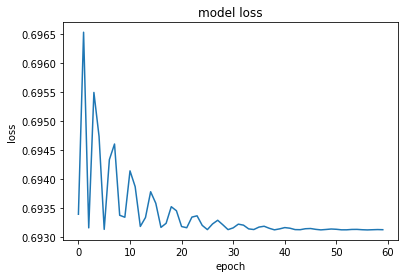

In [26]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=1000

In [27]:
number_of_epochs = 60
layer_size = 10000
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10000)             20000     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 10001     
Total params: 30,001
Trainable params: 30,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
1/1 [==============================] - 2s 2s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/60
1/1 [==============================] - 2s 2s/step - loss: 0.7351 - accuracy: 0.5000
Epoch 3/60
1/1 [==============================] - 2s 2s/step - loss: 0.6940 - accuracy: 0.5000
Epoch 4/60
1/1 [==============================] - 2s 2s/step - loss: 0.7294 - accuracy: 0.5000
Epoch 5/60
1/1 [==============================] - 2s 2s/step - loss: 0.7126 - accuracy: 0.5000
Epoch 6/60
1/1 [=====================

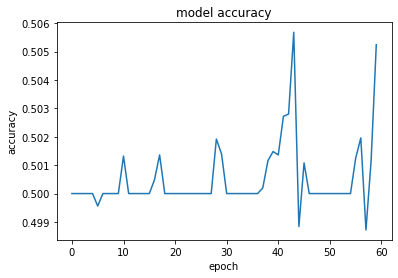

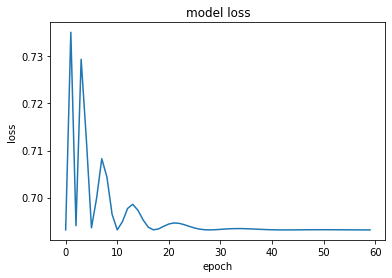

In [28]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size= 10000

In [29]:
number_of_epochs = 40
layer_size_1 = 100
layer_size_2 = 100
model = Sequential()
model.add(Dense(layer_size_1,input_dim=1,activation='relu'))
model.add(Dense(layer_size_2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
1/1 [==============================] - 1s 711ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 2/40
1/1 [==============================] - 0s 40ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 3/40
1/1 [==============================] - 0s 34ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 4/40
1/1 [==============================] - 0s 36ms/step - loss: 0.6947 - accuracy

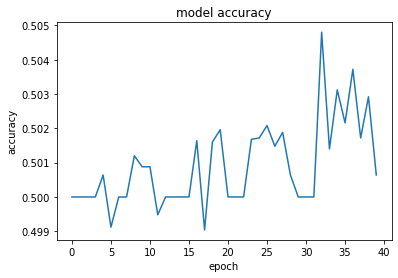

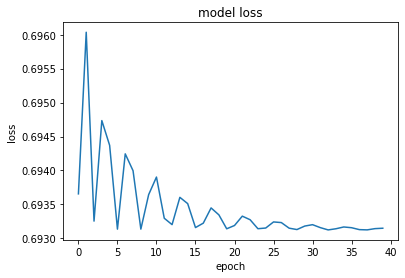

In [30]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Sizes = 100,100

In [33]:
layer_size_1 = 100
layer_size_2 = 100
layer_size_3 = 100
layer_size_4 = 100
layer_size_5 = 100
number_of_epochs = 40
model = Sequential()
model.add(Dense(layer_size_1,input_dim=1,activation='relu'))
model.add(Dense(layer_size_2,activation='relu'))
model.add(Dense(layer_size_3,activation='relu'))
model.add(Dense(layer_size_4,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 101       
Total params: 40,701
Trainable params: 40,701
Non-trainable params: 0
__________________________________________________

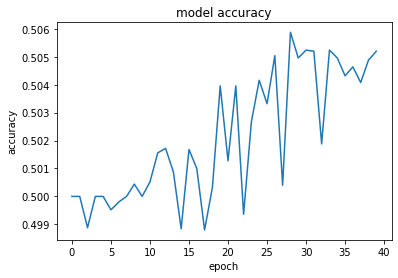

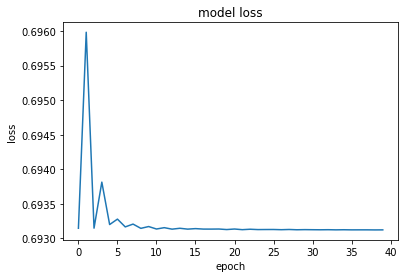

In [34]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Sizes = 100 x 5

In [39]:
layer_size_1 = 100
layer_size_2 = 100
layer_size_3 = 100
layer_size_4 = 100
layer_size_5 = 100
number_of_epochs = 1000
model = Sequential()
model.add(Dense(layer_size_1,input_dim=1,activation='relu'))
model.add(Dense(layer_size_2,activation='relu'))
model.add(Dense(layer_size_3,activation='relu'))
model.add(Dense(layer_size_4,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

0.5169
Epoch 805/1000
1/1 [==============================] - 0s 171ms/step - loss: 0.6921 - accuracy: 0.5166
Epoch 806/1000
1/1 [==============================] - 0s 157ms/step - loss: 0.6921 - accuracy: 0.5184
Epoch 807/1000
1/1 [==============================] - 0s 164ms/step - loss: 0.6921 - accuracy: 0.5175
Epoch 808/1000
1/1 [==============================] - 0s 195ms/step - loss: 0.6920 - accuracy: 0.5174
Epoch 809/1000
1/1 [==============================] - 0s 168ms/step - loss: 0.6920 - accuracy: 0.5170
Epoch 810/1000
1/1 [==============================] - 0s 171ms/step - loss: 0.6921 - accuracy: 0.5180
Epoch 811/1000
1/1 [==============================] - 0s 156ms/step - loss: 0.6921 - accuracy: 0.5180
Epoch 812/1000
1/1 [==============================] - 0s 171ms/step - loss: 0.6921 - accuracy: 0.5172
Epoch 813/1000
1/1 [==============================] - 0s 161ms/step - loss: 0.6920 - accuracy: 0.5172
Epoch 814/1000
1/1 [==============================] - 0s 168ms/step - loss:

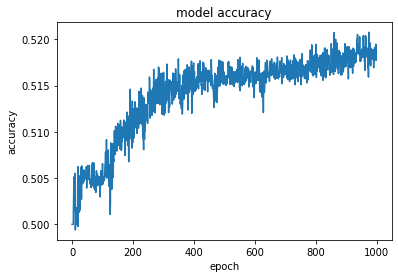

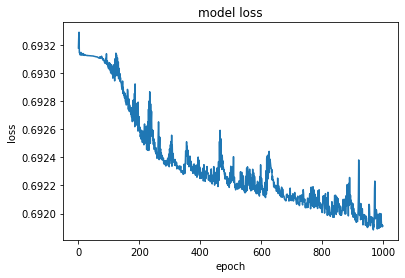

In [40]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Sizes = 100 x 10

In [41]:
layer_size_1 = 100
layer_size_2 = 100
layer_size_3 = 200
layer_size_4 = 300
layer_size_5 = 500
number_of_epochs = 50
model = Sequential()
model.add(Dense(layer_size_1,input_dim=1,activation='relu'))
model.add(Dense(layer_size_2,activation='relu'))
model.add(Dense(layer_size_3,activation='relu'))
model.add(Dense(layer_size_4,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_79 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_80 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_81 (Dense)             (None, 300)               60300     
_________________________________________________________________
dense_82 (Dense)             (None, 500)               150500    
_________________________________________________________________
dense_83 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_84 (Dense)             (None, 500)             

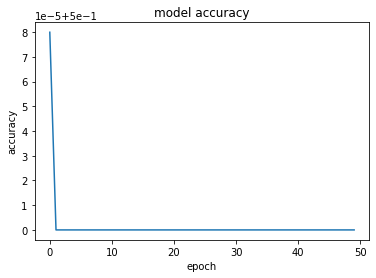

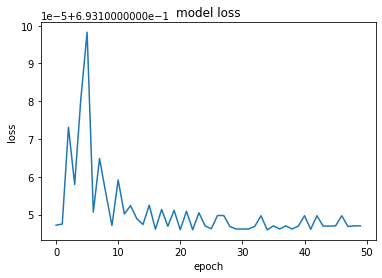

In [42]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Sizes = 100,100,200,300, (500 x 26)

In [17]:
tp = 0
tn = 0
fp = 0
fn = 0
y_pred = model.predict(x_train)
for i in range(len(y_pred)):
    if(y_pred[i]>0.5 and y_train[i]==1): tp+=1
    if(y_pred[i]>0.5 and y_train[i]==0): fp+=1
    if(y_pred[i]<=0.5 and y_train[i]==1): fn+=1
    if(y_pred[i]<=0.5 and y_train[i]==0): tn+=1
print(tp)
print(tn)
print(fp)
print(fn)

6256
6307
6193
6244


In [18]:
class BloomFilter:
    
    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        
    def add(self, num):
        for seed in range(1,self.hash_count+1):
            result = mmh3.hash(str(num), seed) % self.size
            self.bit_array[result] = 1
            
    def lookup(self, num):
        for seed in range(1,self.hash_count+1):
            result = mmh3.hash(str(num), seed) % self.size
            if self.bit_array[result] == 0:
                return False
        return True

#adds ratio r of an array of random integers of size n to bloom filter bf(input : bf,size,ratio; output: data array)
def addrandom(bf,n,r):
    data=np.empty(n,dtype=int)
    for i in range(0,n):
        data[i]=random.randint(0, 100000000)
    for j in range(0,int(n*r)):
        bf.add(data[j]);
    return data

#(Input:bloom filter,number array,ratio of positives; Output:(-1) for false negative, otherwise fpr)
def fpr(bf,nums,r):
    for i in range(int(len(nums)*r)):
        if(bf.lookup(nums[i])==False):
            print(nums[i])
            return -1
    count = 0
    for i in range(int(len(nums)*r),len(nums)):
        if(bf.lookup(nums[i])==True):
            count+=1
    return count/(len(nums)-int(len(nums)*r))

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k

#(Input:size of bloom filter, number of hash functions, total numbers, ratio of numbers inserted; Output: fpr)
def find_fpr(m,k,n,r):
    bf=BloomFilter(m,k)
    data=addrandom(bf,n,r)
    return fpr(bf,data,r)

#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    k=eff_k(m,n,r)
    find_fpr(m,k,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [19]:
def load_bloom(model,data_x,data_y,bf,n):
    y_pred = model.predict(data_x)
    for i in range(0,n):
        if((y_pred[i]<=0.5)and(data_y[i]==1)):
                bf.add(data_x[i])

In [20]:
#m=75000
#n=25000
#r=0.5
k=eff_k(m,n,r)
bf=BloomFilter(m,k)

In [21]:
load_bloom(model,x_train,y_train,bf,n)

In [31]:
def lookup_model(model,data,bf):
    if(model.predict(data)<=0.5):
        if(bf.lookup(data)==False):
            return False
    return True

In [33]:
print(lookup_model(model,x_train[0],bf))

True


In [34]:
def calculate_fpr(model,bf,x_train,y_train):
    np=0
    y_pred = model.predict(x_train)
    for i in range(len(x_train)):
        if((y_pred[i]>0.5 or bf.lookup(x_train[i])) and y_train[i]==0):
            np+=1
            continue
        if((y_pred[i]<=0.5 and bf.lookup(x_train[i])==False) and y_train[i]==1):
            print(i)
            return -1
    neg=len(y_train)-K.sum(y_train)
    return float(np/neg)

In [35]:
print(calculate_fpr(model,bf,x_train,y_train))

0.4988
